<a href="https://colab.research.google.com/github/dheerajjoshim/machinelearningcourse/blob/master/ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#To fit a model to find the Orange cap holder that is top run getter

In [ ]:
#The data concerns city-cycle fuel consumption in miles per gallon,
    #to be predicted in terms of 3 multiva#lued discrete and 5 continuous attributes.
import numpy as np #python library for numerical functions
import pandas as pd #for making dataframes
import scipy.stats as stats #library for statistics functions like probability etc
import statsmodels.api as sm #python library for stats models
import matplotlib.pyplot as plt # to plot charts
import sklearn  #python library for linear models & others
from sklearn.linear_model import LinearRegression 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files #loading data from google colab
uploaded = files.upload()

Saving IPL_TopRunGetters_v01.csv to IPL_TopRunGetters_v01.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['IPL_TopRunGetters_v01.csv']))
data.head(5) #Read first 5 entries

,Name,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Year
0,David Warner,12,12,2,692,100,69.2,481,143.86,1,8,57,21,2019
1,KL Rahul,14,14,3,593,100,53.9,438,135.38,1,6,49,25,2019
2,Quinton de Kock,16,16,1,529,81,35.26,398,132.91,0,4,45,25,2019
3,Shikhar Dhawan,16,16,1,521,97*,34.73,384,135.67,0,5,64,11,2019
4,Andre Russell,14,13,4,510,80*,56.66,249,204.81,0,4,31,52,2019


In [ ]:
data.corr()

,Mat,Inns,NO,Runs,BF,SR,100,50,4s,6s,Year
Mat,1.000000,0.841051,0.446370,0.630402,0.638734,0.208669,0.131653,0.455328,0.580578,0.532606,0.014458
Inns,0.841051,1.000000,0.349692,0.853320,0.863783,0.207612,0.204841,0.640737,0.801781,0.716367,0.001779
NO,0.446370,0.349692,1.000000,0.155465,0.144238,0.114879,-0.008690,0.054119,0.036687,0.174451,0.044038
Runs,0.630402,0.853320,0.155465,1.000000,0.984046,0.292608,0.388248,0.877540,0.953834,0.852336,0.018041
BF,0.638734,0.863783,0.144238,0.984046,1.000000,0.196825,0.357680,0.860186,0.947838,0.776239,0.019241
SR,0.208669,0.207612,0.114879,0.292608,0.196825,1.000000,0.110848,0.229909,0.256654,0.413896,-0.001987
100,0.131653,0.204841,-0.008690,0.388248,0.357680,0.110848,1.000000,0.256641,0.357840,0.366546,0.016160
50,0.455328,0.640737,0.054119,0.877540,0.860186,0.229909,0.256641,1.000000,0.847072,0.731740,0.030231
4s,0.580578,0.801781,0.036687,0.953834,0.947838,0.256654,0.357840,0.847072,1.000000,0.718274,0.011106
6s,0.532606,0.716367,0.174451,0.852336,0.776239,0.413896,0.366546,0.731740,0.718274,1.000000,0.039462


           Mat      Inns        NO  ...        4s        6s      Year
Mat   1.000000  0.841051  0.446370  ...  0.580578  0.532606  0.014458
Inns  0.841051  1.000000  0.349692  ...  0.801781  0.716367  0.001779
NO    0.446370  0.349692  1.000000  ...  0.036687  0.174451  0.044038
Runs  0.630402  0.853320  0.155465  ...  0.953834  0.852336  0.018041
BF    0.638734  0.863783  0.144238  ...  0.947838  0.776239  0.019241
SR    0.208669  0.207612  0.114879  ...  0.256654  0.413896 -0.001987
100   0.131653  0.204841 -0.008690  ...  0.357840  0.366546  0.016160
50    0.455328  0.640737  0.054119  ...  0.847072  0.731740  0.030231
4s    0.580578  0.801781  0.036687  ...  1.000000  0.718274  0.011106
6s    0.532606  0.716367  0.174451  ...  0.718274  1.000000  0.039462
Year  0.014458  0.001779  0.044038  ...  0.011106  0.039462  1.000000

[11 rows x 11 columns]


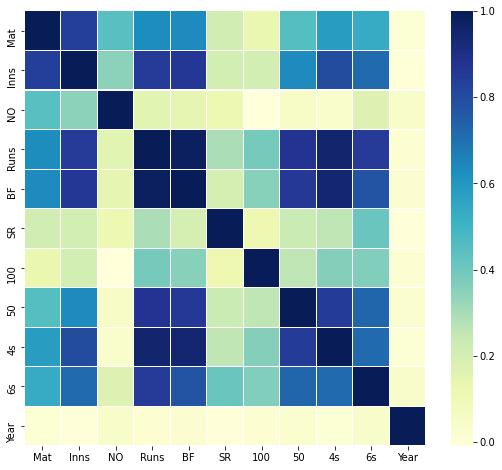

In [ ]:
#i = np.corrcoef(data['Runs'],data['BF'])
#print (i) 


corrmat = data.corr() 
print(corrmat)
import seaborn as sns 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

#The problem we see from visualization of this issue is multicollinearity



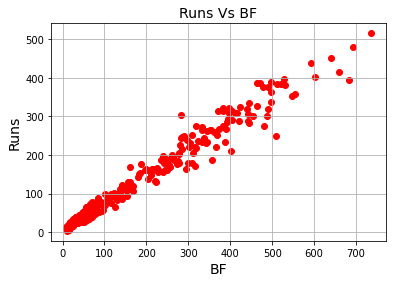

In [ ]:
#The linear relationship of BF & runs ensures that its one of deciding factor for top 3 orange cap holder
plt.scatter(data['Runs'], data['BF'], color='red')
plt.title('Runs Vs BF', fontsize=14)
plt.xlabel('BF', fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.grid(True)
plt.show()

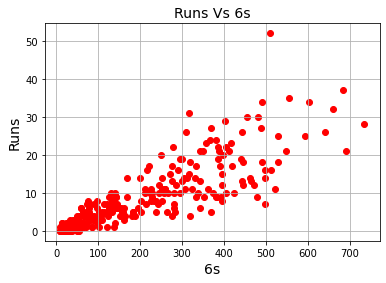

In [ ]:
#The linear relationship of 6s & runs ensures that its one of deciding factor for top 3 orange cap holder
plt.scatter(data['Runs'], data['6s'], color='red')
plt.title('Runs Vs 6s', fontsize=14)
plt.xlabel('6s', fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.grid(True)
plt.show()

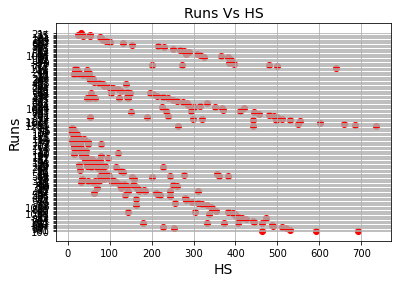

In [ ]:
#The linear relationship of HS & runs ensures that its one of deciding factor for top 3 orange cap holder
plt.scatter(data['Runs'], data['HS'], color='red')
plt.title('Runs Vs HS', fontsize=14)
plt.xlabel('HS', fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
df = pd.DataFrame(data,columns=['Mat','Inns',	'NO',	'Runs',	'BF',	'SR','100','50','4s','6s', 'Year','Name'])


In [ ]:
X=data[['BF','6s']]
Y=data['Runs']
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regr.predict(X)
regr.coef_


array([1.16089273, 4.40638021])

In [ ]:
regr.intercept_
#Runs=1.16089273 (BF) + 4.40638021(6s) -7.218862248573458
#KaneWilliamson		516	28 --> 715 Runs	
#David Warner		481	21	
#Rishabh Pant		394	37	
#KL Rahul		416	32	


-7.218862248573458

In [ ]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Runs   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.227e+04
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          3.32e-286
Time:                        00:57:30   Log-Likelihood:                -1298.7
No. Observations:                 300   AIC:                             2603.
Df Residuals:                     297   BIC:                             2615.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.2189      1.622     -4.452      0.0

In [ ]:
#print('Predicted values: ', model.predict())
df = pd.DataFrame({'Name' : data['Name'], 'Actual': Y, 'Predicted': model.predict()})
df
df.head(10)



,Name,Actual,Predicted
0,David Warner,692,643.704525
1,KL Rahul,593,611.411658
2,Quinton de Kock,529,564.975949
3,Shikhar Dhawan,521,487.034128
4,Andre Russell,510,510.975198
5,Chris Gayle,490,512.922845
6,Rishabh Pant,488,460.021222
7,Virat Kohli,464,430.836896
8,Shreyas Iyer,463,502.575054
9,Jonny Bairstow,445,400.628624


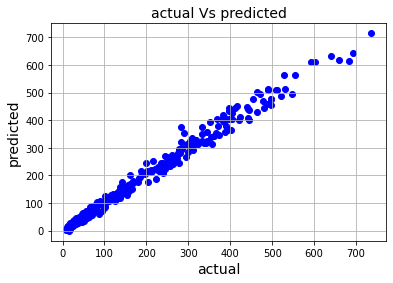

In [ ]:
plt.scatter(df['Runs'],model.predict(X), color='blue')
#plt.scatter(df['mpg_target'],((45.82826481701349) + (-0.04431582)* df['horsepower'] + (-0.00595438)* df['weight']), color='green')
plt.title('actual Vs predicted', fontsize=14)
plt.xlabel('actual', fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.grid(True)
plt.show()